In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
import sklearn
import keras
import json

from keras.callbacks import ModelCheckpoint
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


from Classfication import model
#rom Raw_Data_Read import extract_data
from Confusion_Matrix import plot_confusion_matrix

%matplotlib inline
seed = 5

In [2]:
import matplotlib as mpl
import pylab

mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.color'] = 'r'
mpl.rcParams['font.weight'] = 200
plt.style.use('seaborn-whitegrid')
plt.rc('figure',figsize=(20,10))
mpl.axes.Axes.annotate
mpl.rcParams['font.family'] = "serif"
pylab.rcParams['ytick.major.pad']='10'
pylab.rcParams['xtick.major.pad']='10'
mpl.rcParams['font.weight'] = "semibold"
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.linewidth'] = 4
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['legend.fontsize'] = 14

# Read BAR dataset

In [ ]:
training_person = ['Player']
training_sensor = ['Hand','Palm','Right_Leg','Left_Leg']  

#testing_person = ['Player']
#testing_sensor = ['Hand','Palm','Right_Leg','Left_Leg']  

In [ ]:
training_data,training_label = extract_data(training_person,training_sensor)

#testing_data,testing_label = extract_data(testing_person,testing_sensor)

# One-Hot-Encoding for the Activity Labels

In [ ]:
training_data.shape

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(training_label)
#integer_encoded_testing = label_encoder.fit_transform(testing_label)
print(integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#integer_encoded_testing = integer_encoded_testing.reshape(len(integer_encoded_testing), 1)
training_label_encoded = onehot_encoder.fit_transform(integer_encoded)
#testing_label_encoded = onehot_encoder.fit_transform(integer_encoded_testing)

# Define Parameters -  Make required changes in the classification.py for time-based decay learning rate tuning

In [ ]:
numOfRows = training_data.shape[1]
numOfColumns = training_data.shape[2]
numClasses = training_label_encoded.shape[1]


reshapedSegments = training_data.reshape(training_data.shape[0], numOfRows, numOfColumns)

X_train, X_test, y_train, y_test = train_test_split(reshapedSegments,training_label_encoded ,test_size=0.2, random_state=seed)

# Calling the Classfication Model

In [ ]:
model = model()
print(model.summary())
keras.utils.plot_model(model, show_shapes=True)

# Saving the best model

In [ ]:
if not os.path.exists('Classification Results'):
    os.makedirs('Classification Results')

In [ ]:
current_date_and_time = datetime.datetime.now()
current_date_and_time_string = str(current_date_and_time)

checkpoint = ModelCheckpoint("Classification Results/Best_Classification_model_"+current_date_and_time_string+".hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto', period=1)

# Model Fit

In [ ]:
model = model()
history = model.fit(X_train,y_train,epochs=150,batch_size=400,validation_split=0.25, callbacks=[checkpoint])

In [ ]:
np.mean(history.history['acc'][140:150])

In [ ]:
np.mean(history.history['val_acc'][140:150])

In [ ]:
model = model()
history = model.fit(X_train,y_train,epochs=128,batch_size=300,validation_split=0.2)

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
#max_y_pred_test = np.argmax(y_pred_test, axis=1)
#max_y_test = onehot_encoder.inverse_transform(y_test)
#cm = metrics.confusion_matrix(max_y_test, max_y_pred_test)

In [ ]:
np.histogram(max_y_pred_test)

In [ ]:
y_test[0,:]

In [ ]:
print(accuracy_score(max_y_test, max_y_pred_test))

In [ ]:
history.history.keys()

# Plot the Results

In [ ]:
Person = ['Player1']

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
fig.savefig("Classification Results/Model_Accuracy_"+Person"_Hand_Palm_"+current_date_and_time_string+".png",dpi=300, bbox_inches='tight', pad_inches=0)


fig = plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
fig.savefig("Classification Results/Training_Validation_Loss_"+Person"_Hand_Palm_"+current_date_and_time_string+".png",dpi=300, bbox_inches='tight', pad_inches=0)

# Plot Confusion Matrix

In [ ]:
target_names = ['Forehand Service','Backhand Service','Clear Lob Overhead Forehand','Clear Lob Overhead Backhand','Clear Lob Underarm Forehand',
         'Clear Lob Underarm Backhand','Net Shot Underarm Forehand','Net Shot Underarm Backhand','Drop Shot Overhead Forehand','Drop Shot Overhead Backhand',
         'Smash Overhead Forehand','Smash Overhead Backhand']

In [ ]:
cm_cmap=plt.cm.Blues
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=target_names, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
plt.savefig('Classification Results/Confusion_Matrix.png', bbox_inches='tight', pad_inches=0,dpi=300)

# Classification Metrics

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

FP = np.average(FP)
FN = np.average(FN)
TP = np.average(TP)
TN = np.average(TN)


recall = TP / (TP + FN)
inverse_recall = TN / (FP + TN)
precision = TP / (TP + FP)
inverse_precision = TN / (FN + TN)


informedness = recall + inverse_recall - 1
markedness = precision + inverse_precision -1
F1_Score = 2 * (precision * recall) / (precision + recall)

In [ ]:
print(f"Recall : ", recall)
print(f"Precision : ", precision)
print(f"F1-Score : ", F1_Score)
print(f"Informedness : ", informedness)
print(f"Markedness : ", markedness)

# Accuracy Plots

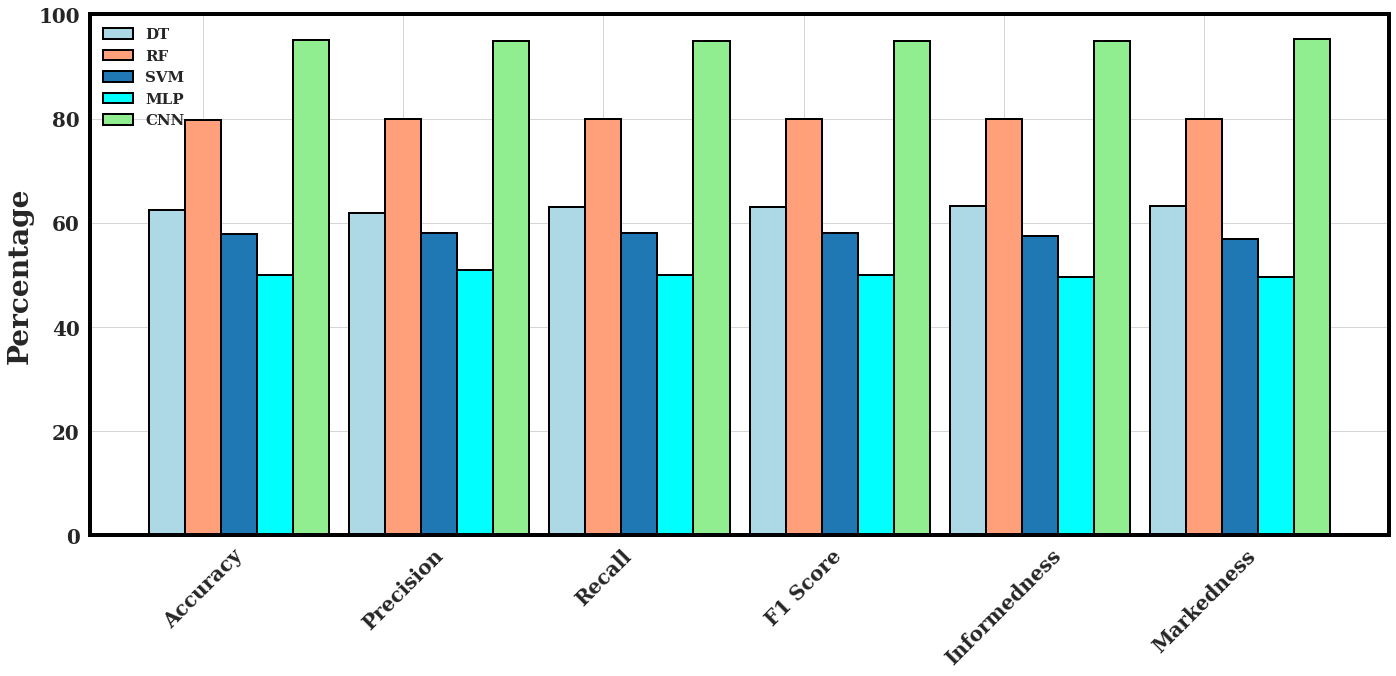

<Figure size 1440x720 with 0 Axes>

In [4]:
DT = [62.6, 62, 63, 63, 63.32, 63.32]
RF = [79.7, 80, 80, 80, 80, 80]
SVM = [57.82, 58, 58, 58, 57.5, 57.0]
MLP = [50.05, 51, 50, 50, 49.6, 49.7]
CNN = [95.21, 95, 95, 95, 94.9, 95.3]

labels = ['Accuracy' , 'Precision', 'Recall','F1 Score','Informedness','Markedness']

barWidth = 0.18
r1 = np.arange(len(DT))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

fig, ax = plt.subplots()
rects1 = ax.bar(r1, DT, width=barWidth, edgecolor='black',linewidth=2, label='DT',color = 'lightblue')
rects2 = ax.bar(r2, RF, width=barWidth, edgecolor='black', linewidth=2,label='RF',color= 'lightsalmon')
rects3 = ax.bar(r3, SVM, width=barWidth, edgecolor='black', label='SVM',linewidth=2)
rects4 = ax.bar(r4, MLP, width=barWidth, edgecolor='black', label='MLP',linewidth=2,color= 'cyan')
rects5 = ax.bar(r5, CNN, width=barWidth, edgecolor='black', label='CNN',linewidth=2, color ='lightgreen')

# Add text for labels, title and custom x-axis tick labels
ax.set_ylabel('Percentage',fontweight='bold',fontsize=28)
ax.set_xticks(r1)
plt.xticks([r + barWidth for r in range(len(r1))], ['Accuracy', 'Precision', 'Recall', 'F1 Score','Informedness','Markedness'],fontweight='bold',fontsize=20, rotation = 45)
ax.legend(loc='upper left', prop={'weight':'bold','size': 15})



def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=17, fontweight='bold' )


#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
#autolabel(rects5)

fig.tight_layout(pad=2.9, w_pad=4.0, h_pad=4.0)

plt.show()
plt.savefig("Accuracy.png", format='png',bbox_inches='tight', pad_inches=0,dpi=300)

# Dumping the results

In [ ]:
dict_vals = {'PRECISION': precision,
                 'RECALL': recall,
                 'F1_SCORE': F1_Score,
                 'INFORMEDNESS': informedness,
                 'MARKEDNESS': markedness
                 }

json_dump = json.dumps(dict_vals)
f = open("Classification Results/Metrics_deep_learning_classification_"+current_date_and_time_string+".json", "w")
f.write(json_dump)
f.close()

print(f"Successful!! Files stored")